In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('diabetic_data.csv')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


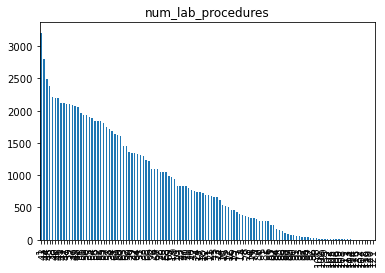

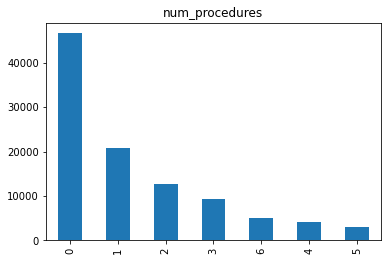

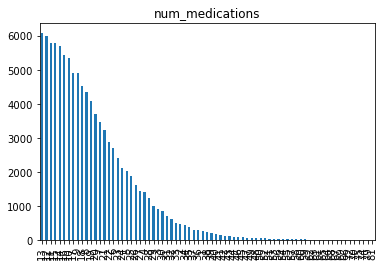

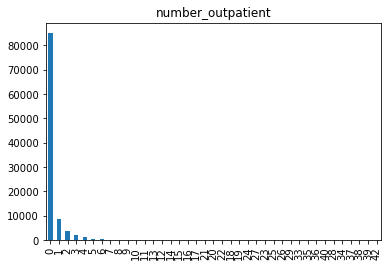

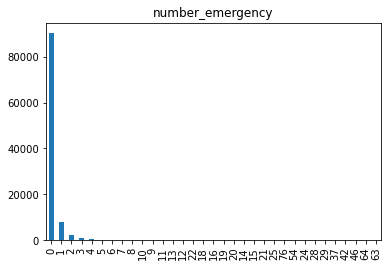

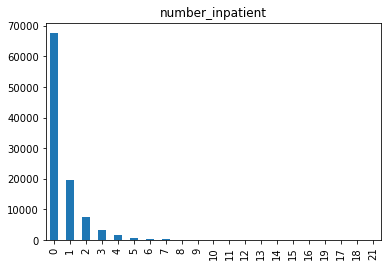

In [3]:
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient']:
    df[i].value_counts().plot(kind = 'bar')
    plt.title(i)
    plt.show()

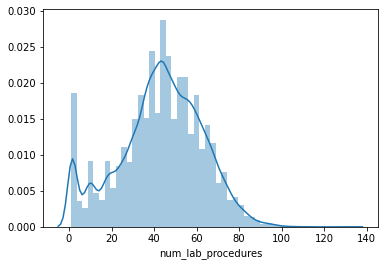

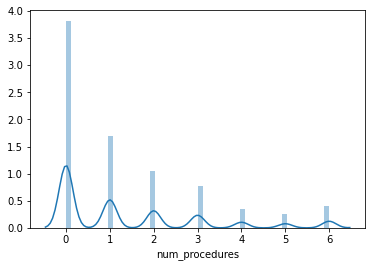

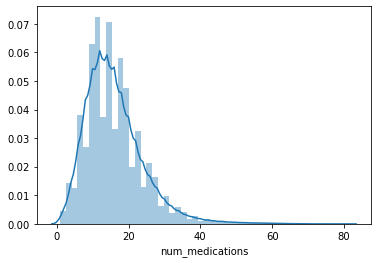

C:\Users\Saurabh Tayal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


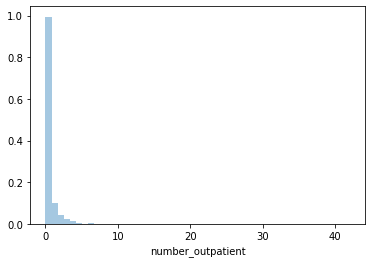

C:\Users\Saurabh Tayal\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


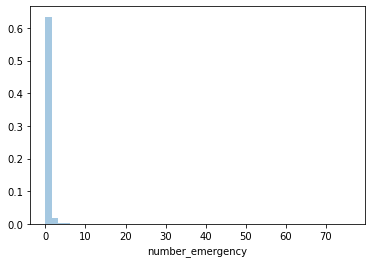

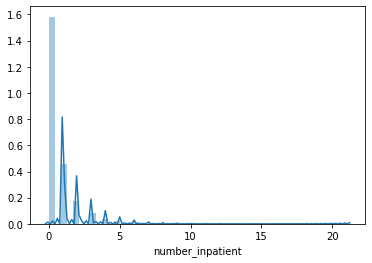

In [4]:
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient']:
    sns.distplot(df[i])
    plt.show()

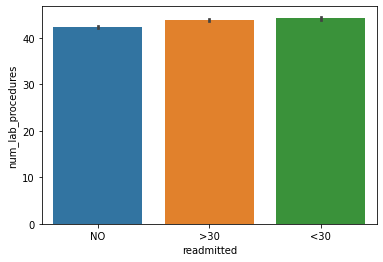

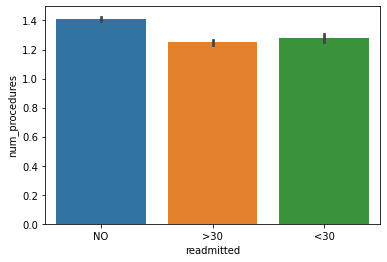

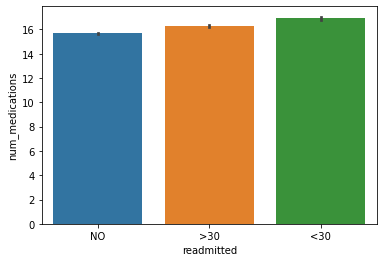

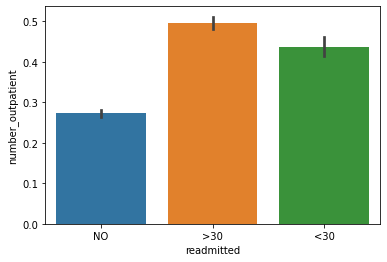

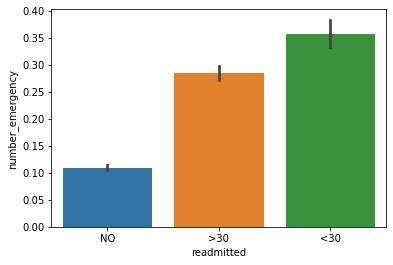

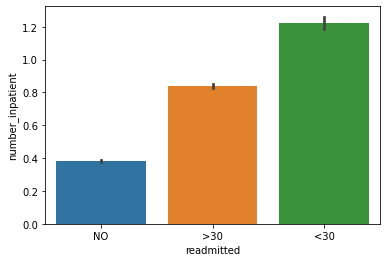

In [5]:
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient']:
    sns.barplot('readmitted', i, data = df)
    plt.show()

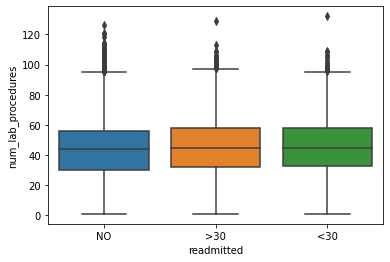

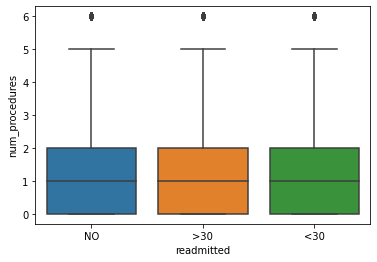

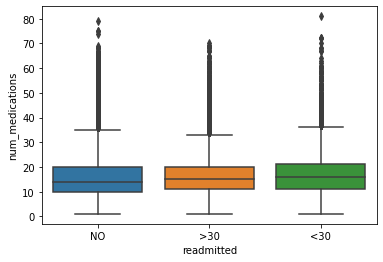

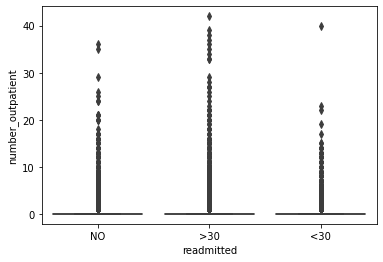

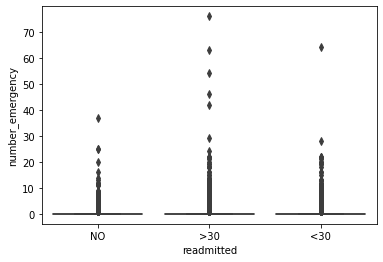

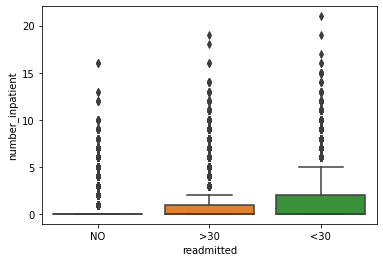

In [6]:
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient']:
    sns.boxplot('readmitted', i, data = df)
    plt.show()

In [7]:
import scipy.stats as stats

In [8]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

In [9]:
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient']:
    res = stats.f_oneway(df[i][df['readmitted'] == 'NO'],
                  df[i][df['readmitted'] == '>30'],
                  df[i][df['readmitted'] == '<30'])
    print(i, res)

num_lab_procedures F_onewayResult(statistic=80.21071773284646, pvalue=1.557243276756841e-35)
num_procedures F_onewayResult(statistic=103.54126709214778, pvalue=1.1975406517965434e-45)
num_medications F_onewayResult(statistic=136.74921080848245, pvalue=4.900463977647552e-60)
number_outpatient F_onewayResult(statistic=355.23269329892986, pvalue=1.82159082912971e-154)
number_emergency F_onewayResult(statistic=573.257192814048, pvalue=2.688984098469832e-248)
number_inpatient F_onewayResult(statistic=2963.3238431258374, pvalue=0.0)


In [10]:
df_sort = df.sort_values(by = 'encounter_id')
df_dropped = df_sort.drop_duplicates('patient_nbr', keep = 'first')
patients = df_dropped['patient_nbr'].value_counts()
patients[patients > 1]

Series([], Name: patient_nbr, dtype: int64)

In [11]:
df_dropped['readmitted'] = df_dropped['readmitted'].replace({'>30' : 'NO'})

<ipython-input-11-414ac65ee404>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped['readmitted'] = df_dropped['readmitted'].replace({'>30' : 'NO'})


In [12]:
df_dropped['readmitted'].value_counts()

NO     65225
<30     6293
Name: readmitted, dtype: int64

In [13]:
for i in ['num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 
          'number_inpatient', 'number_diagnoses']:
    res = stats.f_oneway(df_dropped[i][df_dropped['readmitted'] == 'NO'],
                  df_dropped[i][df_dropped['readmitted'] == '<30'])
    print(i, res)

num_lab_procedures F_onewayResult(statistic=59.67661528285849, pvalue=1.1324365694781037e-14)
num_procedures F_onewayResult(statistic=0.1385170201161949, pvalue=0.7097608711408551)
num_medications F_onewayResult(statistic=83.76411766888982, pvalue=5.716395225179096e-20)
number_outpatient F_onewayResult(statistic=5.36242859691486, pvalue=0.020577915647250082)
number_emergency F_onewayResult(statistic=57.11765370481235, pvalue=4.153746130352911e-14)
number_inpatient F_onewayResult(statistic=711.2862593347745, pvalue=6.118419092275167e-156)
number_diagnoses F_onewayResult(statistic=124.81931580731748, pvalue=5.891413182551429e-29)


In [15]:
df_dropped['discharge_disposition_id'].value_counts()

1     44317
3      8784
6      8289
18     2474
2      1539
22     1410
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [16]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [17]:
for i in ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone']:
    print(df_dropped[i].value_counts(), end = '\n\n')

No        56527
Steady    13718
Up          838
Down        435
Name: metformin, dtype: int64

No        70592
Steady      824
Up           73
Down         29
Name: repaglinide, dtype: int64

No        71020
Steady      474
Up           16
Down          8
Name: nateglinide, dtype: int64

No        71446
Steady       67
Up            4
Down          1
Name: chlorpropamide, dtype: int64

No        67773
Steady     3372
Up          235
Down        138
Name: glimepiride, dtype: int64

No        71517
Steady        1
Name: acetohexamide, dtype: int64

No        62412
Steady     8150
Up          578
Down        378
Name: glipizide, dtype: int64

No        63664
Steady     6812
Up          621
Down        421
Name: glyburide, dtype: int64

No        71499
Steady       19
Name: tolbutamide, dtype: int64

No        66210
Steady     5047
Up          180
Down         81
Name: pioglitazone, dtype: int64

No        66817
Steady     4490
Up          136
Down         75
Name: rosiglitazone, dtype: in

In [21]:
insig = []
sig = []
for i in ['max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'gender', 'diag_1', 'diag_2', 'diag_3']:
    tab = pd.crosstab(df_dropped[i], df_dropped['readmitted'])
    a, b, c, d = stats.chi2_contingency(tab)
    print(i)
    print(b, end = '\n\n')
    if (b > 0.05):
        insig.append(i)
    else:
        sig.append(i)
print(insig)
print(len(insig))
print(sig)
print(len(sig))

max_glu_serum
0.0958383890352208

A1Cresult
0.14535750231799513

metformin
0.012710900968882237

repaglinide
3.0168103603472575e-05

nateglinide
0.4431270750607327

chlorpropamide
0.5634063881099463

glimepiride
0.25256310013995015

acetohexamide
0.14583131521175985

glipizide
0.0015645587404753177

glyburide
0.40804572474677436

tolbutamide
0.8893028381230464

pioglitazone
0.40990691985931293

rosiglitazone
0.7446317671181397

acarbose
0.2795645416747876

miglitol
0.9341774697181611

troglitazone
0.6304850603137497

tolazamide
0.4625104650661407

examide
1.0

citoglipton
1.0

insulin
1.4494682090082057e-10

glyburide-metformin
0.44438533983287754

glipizide-metformin
0.877056340213845

glimepiride-pioglitazone
1.0

metformin-rosiglitazone
0.4186341774461627

metformin-pioglitazone
0.14583131521175985

gender
0.7076763312102174

diag_1
5.657535202476892e-49

diag_2
6.166221081919097e-11

diag_3
1.1323009563762986e-18

['max_glu_serum', 'A1Cresult', 'nateglinide', 'chlorpropamide', 'gli

In [19]:
df_dropped.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
10,28236,89869032,AfricanAmerican,Female,[40-50),?,1,1,7,9,?,?,47,2,17,0,0,0,250.7,403,996,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO


In [22]:
for i in ['diag_1', 'diag_2', 'diag_3']:
    print(df_dropped[i].value_counts())

414    5233
428    3980
786    3040
410    2902
486    2439
       ... 
720       1
27        1
500       1
57        1
229       1
Name: diag_1, Length: 697, dtype: int64
250     5009
276     4604
428     4335
427     3539
401     3088
        ... 
171        1
994        1
E868       1
832        1
947        1
Name: diag_2, Length: 726, dtype: int64
250    9039
401    6588
276    3448
428    2847
427    2707
       ... 
123       1
953       1
853       1
542       1
622       1
Name: diag_3, Length: 759, dtype: int64


In [24]:
df_diag = df_dropped[['diag_1', 'diag_2', 'diag_3']].replace({'?' : np.nan})

In [25]:
df_diag.isna().sum()

diag_1      11
diag_2     294
diag_3    1225
dtype: int64

In [26]:
df_diag = df_diag.dropna()

In [27]:
for i in df_diag.columns:
    tab = pd.crosstab(df_dropped[i], df_dropped['readmitted'])
    a, b, c, d = stats.chi2_contingency(tab)
    print(i)
    print(b, end = '\n\n')

diag_1
5.657535202476892e-49

diag_2
6.166221081919097e-11

diag_3
1.1323009563762986e-18

